# Исследование надежности заемщиков

### Шаг 1. Обзор данных

In [1]:
import pandas as pd

import os

pth1 = '/Users/vadimhlebnikov/Downloads/data1.csv'
pth2 = '/datasets/data.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print('Something is wrong')

#data=pd.read_csv('/Users/vadimhlebnikov/Downloads/data1.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [3]:
display(data)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


Предавариетльный анализ показывает, что в столбце 'days_employed' содержатся отрицательные значения, чего быть не может. Их предстоит заменить на значения взятые по модулю. Также заметны однотипные значения, введенные с разным регистром букв, в столбце 'education'. Поэтому нужно подробнее ознакомиться с перечнем значений этого и других столбцов на предмет неявных дубликатов, а также поверить массив на предмет пропусков и заполнить их.

### Шаг 2.1 Заполнение пропусков

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Найдены пропущнные значения в столбцах 'days_employed' и 'total_income'. Количество пропусков в столбцах одинаково и составляет около 10% строк

### Шаг 2.2 Проверка данных на аномалии и исправления.

In [5]:
(data[data['days_employed'] < 0]['days_employed'].count())/len(data)

0.7389547038327526

In [6]:
(data[data['days_employed'] > 36500]['days_employed'].count())/len(data)

0.16004645760743322

74% значений столбца 'days_employed' представляют собой отрицателные значения, что невозможно для показателя трудового стажа. Еще 16% значений данного столбца указывают на срок трудового стажа более 100 лет, что таже невозможно. Поэтому большая часть данных столбца являются некорректными. Причина некорректности данных, вероятно, кроется в ошибке ввода в виде лишнего минуса. Для решения проблемы вернем модуль чисел в столбце.

In [7]:
data['days_employed'] = data['days_employed'].abs()
display(data)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


In [8]:
data['dob_years'].value_counts()

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

In [9]:
data[data['dob_years'] == 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,346541.618895,0,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль
149,0,2664.273168,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем
270,3,1872.663186,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью
578,0,397856.565013,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости
1040,0,1158.029561,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль
...,...,...,...,...,...,...,...,...,...,...,...,...
19829,0,NaN,0,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,жилье
20462,0,338734.868540,0,среднее,1,женат / замужем,0,F,пенсионер,0,259193.920299,покупка своего жилья
20577,0,331741.271455,0,среднее,1,Не женат / не замужем,4,F,пенсионер,0,129788.762899,недвижимость
21179,2,108.967042,0,высшее,0,женат / замужем,0,M,компаньон,0,240702.007382,строительство жилой недвижимости


Столбец с возрастом клиентов 'dob_years' содержит **101** строку со значением **0 лет**, что невозмоно. Необходимо направить запрос на уточнение данных к их источнику.

In [10]:
data['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

В столбце 'gender' нетипичное значение содержится только в одной строке, что говорит о сравнительно неплохом качестве данных в этой части.

In [11]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [12]:
data.groupby('children')['children'].count()

children
-1        47
 0     14149
 1      4818
 2      2055
 3       330
 4        41
 5         9
 20       76
Name: children, dtype: int64

Выявлено, что в датасете содержится 47 заемщиков с **"-1" ребёнком**, что невозможно, и 76 заемщиков с **20 детьми**. Вероятно, это является ошибкой ввода данных и эти значения нужно заменить на "1" и "20" соответственно. 

In [13]:
data = data.replace({'children':{-1:1, 20:2}})


In [14]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

In [15]:
data.groupby('children')['children'].count()



children
0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

### Шаг 2.3. Изменение типов данных.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [17]:
days_employed_median=data['days_employed'].median()
total_income_median=data['total_income'].median()

In [18]:
data['days_employed']=data['days_employed'].fillna(days_employed_median)
data['total_income']=data['total_income'].fillna(total_income_median)

In [19]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

In [20]:
try:
    data['total_income'] = pd.to_numeric(data['total_income'], errors='coerce').astype(int)
except:
    print('ошибка')

In [21]:
# Код ревьюера

try:
    1 / 0
except:
    print('Произошла какая-то ошибка')
    
try:
    1 / 0
except ZeroDivisionError:
    print('Произошло деление на 0')
    
# 1 / 0

Произошла какая-то ошибка
Произошло деление на 0


In [22]:
print(data['total_income'].sort_values().head(10))
print(data['total_income'].sort_values().tail(10))

14585    20667
13006    21205
16174    21367
1598     21695
14276    21895
10881    22472
18509    23844
9070     24457
10068    25227
12052    25308
Name: total_income, dtype: int64
11071    1286280
15268    1350245
18353    1427934
18368    1551152
17503    1597613
17178    1711309
20809    1715018
9169     1726276
19606    2200852
12412    2265604
Name: total_income, dtype: int64


В столбце 'total_income' очень большой разброс значений, поэтому оптимальным будет провести заполенее пропусков *медианными значениями*. Выполненная проверка показывает, что пропущенных значений в указанных столбцах больше нет.


### Шаг 2.4. Удаление дубликатов.

In [23]:
data.duplicated().sum()

54

In [24]:
data=data.drop_duplicates().reset_index(drop=True)

Выявлены и удалены 54 явных дубликата

In [25]:
data['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

In [26]:
data['family_status'].unique()


array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [27]:
data['income_type'].unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

In [28]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [29]:
data['education']=data['education'].str.lower()

In [30]:
data.duplicated().sum()

17

In [31]:
data=data.drop_duplicates().reset_index(drop=True)

Проведен анализ неявных дубликатов. Выявлены неявные повторы в столбце 'education', данные откорректированы методом str.lower() и удалены вновь выявленные дубликаты.

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

In [32]:
education_id_table=data[['education_id','education']]

In [33]:
family_status_id_table=data[['family_status_id','family_status']]


In [34]:
education_id_table=education_id_table.drop_duplicates().reset_index(drop=True)

In [35]:
family_status_id_table=family_status_id_table.drop_duplicates().reset_index(drop=True)

In [36]:
data=data.drop(['education', 'family_status'],axis=1)

### Шаг 2.6. Категоризация дохода

In [37]:
def income_f (income):
    if income <= 30000:
        return 'E'
    if income <= 50000:
        return 'D'
    if income <= 200000:
        return 'C'
    if income <= 1000000:
        return 'B'
    return 'A'

print(income_f (25000))

print(income_f (235000))  



E
B


Для категоризации клиентов по уровню дохода и целям кредита напишем функции income_f и purpose_cat протестируем их. Затем с их помощью сформируем столбцы с категориями.



In [38]:
data['total_income_category'] = data['total_income'].apply(income_f)

<div class="alert alert-success"; style="border-left: 7px solid green">
<h5> ✔️ <font color="green">Комментарий ревьюера (зеленый)</font></h5>

Рад видеть правильно примененный метод .apply()

</div>

In [39]:
data['total_income_category'].value_counts()

C    16016
B     5041
D      350
A       25
E       22
Name: total_income_category, dtype: int64

### Шаг 2.7. Категоризация целей кредита.

In [40]:
purpose_list=data['purpose'].unique()
purpose_list

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [41]:
def purpose_cat (purpose):
    if 'жил' in purpose:
        return 'операции с недвижимостью'
    if 'недв' in purpose:
        return 'операции с недвижимостью'
    if 'авто' in purpose:
        return 'операции с автомобилем'
    if 'свад' in purpose:
        return 'проведение свадьбы'
    return 'получение образования'


In [42]:
data['purpose_category'] = data['purpose'].apply(purpose_cat)
data.groupby('purpose_category')['debt'].count()


purpose_category
операции с автомобилем       4306
операции с недвижимостью    10811
получение образования        4013
проведение свадьбы           2324
Name: debt, dtype: int64

In [43]:
data_pivot_children = data.pivot_table(index=['children'], columns='debt',values='total_income_category', aggfunc='count')
print(data_pivot_children.head(10)) 

debt            0       1
children                 
0         13028.0  1063.0
1          4410.0   445.0
2          1926.0   202.0
3           303.0    27.0
4            37.0     4.0
5             9.0     NaN


In [44]:
data_pivot_children['share'] = data_pivot_children[1]/(data_pivot_children[1] + data_pivot_children[0])
data_pivot_children['total_share'] = (data_pivot_children[1] + data_pivot_children[0])/(data_pivot_children[1].sum() + data_pivot_children[0].sum())
data_pivot_children

debt,0,1,share,total_share
children,,,,
0,13028.0,1063.0,0.075438,0.656801
1,4410.0,445.0,0.091658,0.226298
2,1926.0,202.0,0.094925,0.099189
3,303.0,27.0,0.081818,0.015382
4,37.0,4.0,0.097561,0.001911
5,9.0,NaN,NaN,NaN


Самая низкая доля задолженностии по возврату кредита у клиентов, которые не имеют детей. Поэтому можно можно констатировать, что наличие детей влияет на вероятность возврата кредита. Вероятность своевременнго невозврата кредита у семьи с двумя детьми несколько возрастает в сравнении с семьей с одним ребенком. У семей с тремя детьми вероятность снижается, но это может быть связано как господдержкой многодетных семей, так и их низким количеством в выборке и соотвтственно высокой статистической погрешностю в группах семейных заемщиков с численностью детей три и более. Для качественных выводов по этой группе, представленый размер выборки недостаточен.  

In [45]:
data_pivot_family = data.pivot_table(index=['family_status_id'], columns='debt',values='total_income_category', aggfunc='count')
print(data_pivot_family.head(10)) 

debt                  0    1
family_status_id            
0                 11408  931
1                  3763  388
2                   896   63
3                  1110   85
4                  2536  274


In [46]:
family_status_id_table

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


In [47]:
data_pivot_family['share'] = data_pivot_family[1]/(data_pivot_family[1] + data_pivot_family[0])
data_pivot_family['total_share'] = (data_pivot_family[1] + data_pivot_family[0])/(data_pivot_family[1].sum() + data_pivot_family[0].sum())

In [48]:
data_pivot_family=data_pivot_family.merge(family_status_id_table,left_on= 'family_status_id', right_on= 'family_status_id')

In [49]:
data_pivot_family

,family_status_id,0,1,share,total_share,family_status
0,0,11408,931,0.075452,0.575138,женат / замужем
1,1,3763,388,0.093471,0.193484,гражданский брак
2,2,896,63,0.065693,0.044700,вдовец / вдова
3,3,1110,85,0.071130,0.055701,в разводе
4,4,2536,274,0.097509,0.130978,Не женат / не замужем


Как показывает анализ, семейный статус заметно влияет на появление просроченной задолженности по кредиту. Вероятность возникновения "просрочки" у женатых заемщиков составляет 7,6%, что на 2,2 процентных пункта меньше, чем у не женатых. Не женатые заемщики являются более рискованными для банка. Заемщики в гражданском браке по уровню риска просрочки ближе к не женатым (9,4%) и по сравнению с женатыми являются достаточно рискованными. 

Вдовцы и заемщики в разводе показывают низакий уровень риска по невозврату клиентов (6,6 и 7,1% соответственно), но их доля в выборке сравнительно невелика (4,5 и 5,5% соответственно) , что делает данные по этим группа менее надежными.

In [50]:
data_pivot_income = data.pivot_table(index=['total_income_category'], columns='debt',values='income_type', aggfunc='count')
data_pivot_income['share'] = data_pivot_income[1]/(data_pivot_income[1] + data_pivot_income[0])
data_pivot_income['total_share'] = (data_pivot_income[1] + data_pivot_income[0])/(data_pivot_income[1].sum() + data_pivot_income[0].sum())
data_pivot_income

debt,0,1,share,total_share
total_income_category,,,,
A,23,2,0.080000,0.001165
B,4685,356,0.070621,0.234968
C,14656,1360,0.084915,0.746527
D,329,21,0.060000,0.016314
E,20,2,0.090909,0.001025


На примере сравнения двух групп заемщиков с доходами от 50 до 200 тыс. руб. в месяц (группа C) и от 200 тыс. до 1 млн руб. (группа B) можно констатировать, что уровень дохода оказывает существенное влияние на вероятность возникновения "просрочки". В группе B доля выхода клиента на просрочку на 1,4 процентных пункта ниже. Анализировать данные по остальным группам заемщиков затруднительно, так как их доля в выборке сравнительно мала и суммарно составляет менее 2%.

In [51]:
data_pivot_purpose = data.pivot_table(index=['purpose_category'], columns='debt',values='income_type', aggfunc='count')
data_pivot_purpose['share'] = data_pivot_purpose[1]/(data_pivot_purpose[1] + data_pivot_purpose[0])
data_pivot_purpose['total_share'] = (data_pivot_purpose[1] + data_pivot_purpose[0])/(data_pivot_purpose[1].sum() + data_pivot_purpose[0].sum())
data_pivot_purpose = data_pivot_purpose.sort_values('share',ascending=False)

In [52]:
data_pivot_purpose

debt,0,1,share,total_share
purpose_category,,,,
операции с автомобилем,3903,403,0.093590,0.200708
получение образования,3643,370,0.092200,0.187051
проведение свадьбы,2138,186,0.080034,0.108325
операции с недвижимостью,10029,782,0.072334,0.503915


Обнаружена значительная разница в вероятности возникнования "просрочки" между группами заемщиков по целям кредитования. Самый высокий риск "просочки" по автокредитованияю (9,4% клиенов допустили не оплату вовремя), самый низкий - в операциях с недвижимостью (7,2%).

### Общий вывод


Предоставленный для анализа датафрейм имел определенные недостатки с точки зрения чистоты данных. В частности трудовой стаж клиентов в значительной части массива имелы отрицательные значения. Поэтому было решено взять модульное значение этих данных. В порядка 10% строк столбцов, содержащих данные о трудовом стаже и доходе клиентов, содержались пропуски. Поэтому они были заменены на медианные значения датафрейма из-за большого разброса данныз в соответствующих столбцах.

#### 1.12.1  Есть ли зависимость между количеством детей и возвратом кредита в срок?
*Да, такая зависимость обнаружена*. Самая низкая доля задолженностии по возврату кредита сложилась у клиентов, которые не имеют детей. Она составляет **7,5%**. У семей с одним ребенком проблемы со своевременныйм возвратом долга возникли в **9,2% случаев**, у семей с двумя детьми - в **9,5%** случаев.

#### 1.12.2  Есть ли зависимость между семейным положением и возвратом кредита в срок?
*Да, такая зависимость обнаружена*. Семейный статус заметно влияет на появление просроченной задолженности по кредиту. Вероятность возникновения "просрочки" у женатых заемщиков составляет **7,6%**, что на **2,2** процентных пункта меньше, чем у не женатых. Не женатые заемщики являются более рискованными для банка. Заемщики в гражданском браке по уровню риска просрочки ближе к не женатым (**9,4%**).

#### 1.12.3  Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
*Да, такая зависимость обнаружена*. Данные клиентов показывают, что уровень дохода оказывает существенное влияние на вероятность возникновения "просрочки". В группе клиентов с доходом *от 200 тыс. до 1 млн руб.* в месяц доля просроченных кредитов составляет **7,1%**, в группе с доходом *от 50 до 200 тыс. руб.* - **8,5%**.

#### 1.12.4  Как разные цели кредита влияют на его возврат в срок?
По целям кредитования наиболее рискованным является автокредитование (выход на "просочку" допущен в **9,4%** случаев). Меньше всего фактов наличия посроченной задолженности в относительном выражении выявлено по направлению кредитов на операции с недвижимостью (**7,2%**). Кредитование на цели образованяи является сравительно рискованным (**9,2%**). Выдача кредитов на свадьбы более перспективна с точки зрения возврата. Проблемы возникли у **8%** заемщиков из данной категории.

<AxesSubplot:xlabel='purpose_category'>

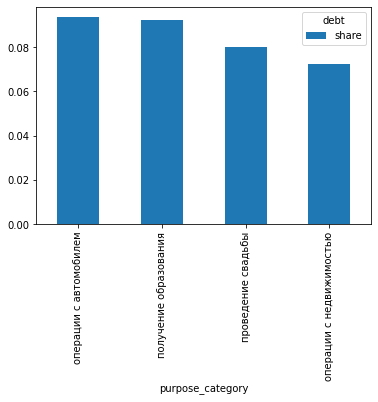

In [53]:
graf=data_pivot_purpose[['share']]
graf.plot.bar()